

# Project: Investigate a Dataset - [NO SHOW APPOINTMENTS]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>  This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. which includes

>*PatientId, *AppointmentID

>*Gender(male, female)

>*ScheduledDay, *AppointmentDay

>*Age (start from age 0-115)

>*Neighbourhood, *Scholarship
 
 >diseases/ diabilities  that the patient have which are
 *Hipertension *Diabetes *Alcoholism *Handcap.
 
 >*SMS_received	
 
 >*No-show
 
>‘ScheduledDay’ tells us on what day the patient set up their appointment

>‘Neighborhood’ indicates the location of the hospital

>‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

>### NOTE: about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up

### Question(s) for Analysis
>  1. Do Gender Affect Appointment Show Up
>  2. What is the Relationship between age and no_show appointment
>  3. What day of the week was appointment set and what day to they show up the most.

In [1]:
# importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling



In [2]:
# reading  my csv file and viewing it
df= pd.read_csv('no_show_data.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# checking the bottom part of the data
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
# checking all the data types if they are in the right state
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
# checking for information about the number of roles and column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> from this i can see i have 110527 rows and 14 columns

> no rows are empty which means the data set is complete in all column

In [6]:
# to check if any of the rows are duplicated
df.duplicated().sum()

0

> 0 shows that no data was duplicated which means no need to delete any rows due to duplicate.

In [7]:
# to check the overview of the unique values present in the data set
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

> from the data count we could see scholarship,hypertension,diabetes,alcoholism,sms recived are represented in 0 and 1

> while no show is (yes,no) and gender (M,F)

> As for the Handcap colum it state 4 unque count which means i need to investigate more

In [8]:
# to check what handcap values are represented by i used the value_count method.
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [9]:
def percentage_cal(x):
    total= 110527
    percent =(x/total)*100
    return int(percent)

In [10]:
percentage_cal(108286)

97

>  97% of the population did not have any disabilities

> this would mean the leavel of disabilities from 0 to 4 which will be the highest disability levle

In [11]:
# getting the overall distribution of the data set we use the describe fuction to kmow the mean,max,standard deviation e.t.c
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> 1. From the distribution i notice that thhe patientid and appointmentid are in the wrong data type.

> 2. The age column needs some cleaning as they cant be any age of -1 

> 3. overall, the rest column are properly distributed with o for minimum count and 1 for maximum, while for handcap 0 minimum and 4 maximum.

>4. changing no-show to no_show the name to an '_' for better representation 

 ## cleaning format

> 1. Since i am focursing on no show appointment i will be droping feild that are not related which are PatientId and ScheduledDay

> 2. Will be changing Hipertension,Diabetes,Alcoholism,Handcap,SMS_received and scholership from string to object type of data.

> 3. changing AppointmentDay from object to daytimme data type.

> 4. Removing the age that are less than 1 years 


### Data Cleaning


In [12]:
# to drop the PatientId and ScheduledDay i used the drop function 
df=df.drop(['PatientId','ScheduledDay'],axis=1)
df

,AppointmentID,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,5642903,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5642503,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,5642549,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,5642828,F,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,5642494,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,5651768,F,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,5650093,F,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,5630692,F,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,5630323,F,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [13]:
# convert Hipertension,Diabetes,Alcoholism,Handcap,SMS_received and scholership from string to object type.
df.iloc[:, 5:11] = df.iloc[:, 5:11].astype(object)

In [14]:
# convert appointment to date.
df['AppointmentDay'] = df['AppointmentDay'].apply(pd.to_datetime, errors='coerce')

In [15]:
#changed the name to an '_' for better representation 
df.rename(columns={'No-show':'no_show'}, inplace = True)

### cleaning the age column

In [16]:
# to count the various value for age
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

From the age distribution a large proportion of the data set are in the '0' number of age,which i think are babies. 

also, we have a '-1' age which i dont think it relivant. leading to me droping it.

In [17]:
# query the age column with '1-' into x
dp = df.query('Age == -1')

In [18]:
# check if it correctly saved
dp

,AppointmentID,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
99832,5775010,F,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [19]:
# droping the '-1' since their is no such age
df=df.drop([99832])

In [20]:
# to check if our code works
df['Age'].value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [21]:
percentage_cal(3539)

3

3% of the population are babies

In [22]:
# query the age column with '0' into x
dz = df.query('Age == 0')

In [23]:
# print the query out 
dz

,AppointmentID,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
59,5638545,F,2016-04-29 00:00:00+00:00,0,CONQUISTA,0,0,0,0,0,0,No
63,5628286,M,2016-04-29 00:00:00+00:00,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,5616082,M,2016-04-29 00:00:00+00:00,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,5628321,M,2016-04-29 00:00:00+00:00,0,CONQUISTA,0,0,0,0,0,0,No
67,5639264,F,2016-04-29 00:00:00+00:00,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110345,5702537,F,2016-06-01 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5777724,M,2016-06-08 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,5772400,F,2016-06-03 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,5769545,F,2016-06-03 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No


In [24]:
# i want to confirm if the zero ages are childern below age 1 because they cant have any of these disease yet.
dz.nunique()

AppointmentID     3539
Gender               2
AppointmentDay      26
Age                  1
Neighbourhood       75
Scholarship          2
Hipertension         1
Diabetes             1
Alcoholism           1
Handcap              2
SMS_received         2
no_show              2
dtype: int64

> Here i concluded that the zero ages are children since they do not have any of the disease. All disease type are 0

> ### i am done with cleaning and my data set are ready for vizualization.

<a id='eda'></a>
## Exploratory Data Analysis




### vizualization of all column to get more insight before research question.

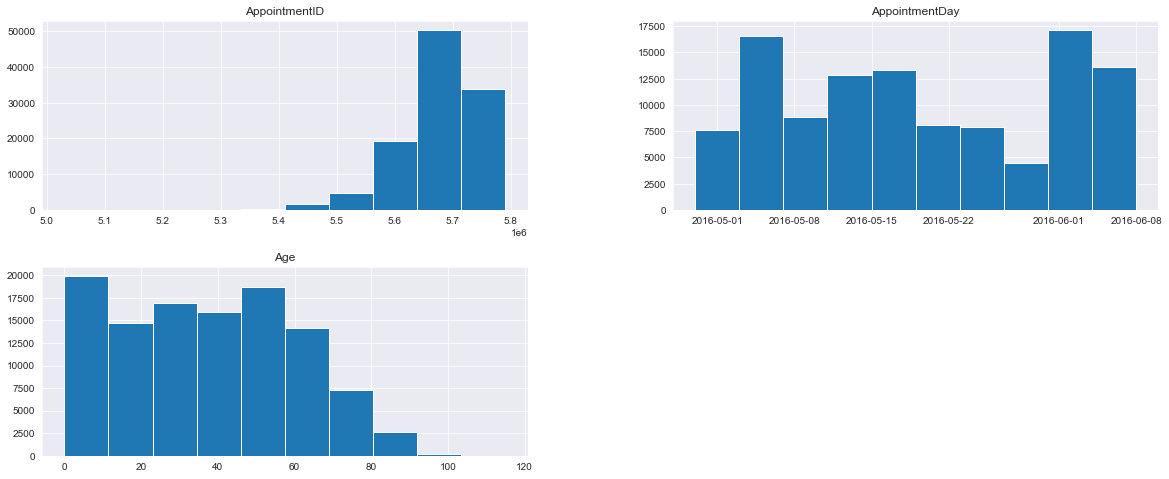

In [25]:
df.hist(figsize= (20,8));

> from this one can see that the year of this data set is 2016
and the age distribution is from zero to slightly above 100

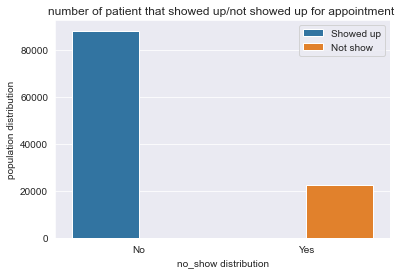

In [26]:
# creating a count plot for scholership distribution.
hx=sns.countplot(x ='no_show',hue='no_show', data = df)
plt.xlabel('no_show distribution') 
plt.ylabel('population distribution')
# displaying the title
plt.title("number of patient that showed up/not showed up for appointment ")
label= ['Showed up', 'Not show']
# here i am using showed up represent No and not show to represent Yes
plt.legend(label)
# Show the plot
plt.show()

### Here i made some changes for future representation because in the note it was written that
"Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up."

will change NO = showed_up and YES = not_show

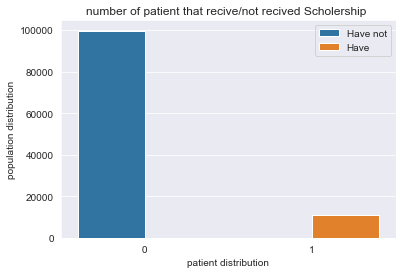

In [27]:
# creating a count plot for scholership distribution.
hx=sns.countplot(x ='Scholarship',hue='Scholarship', data = df)
plt.xlabel('patient distribution') 
plt.ylabel('population distribution')
# displaying the title
plt.title("number of patient that recive/not recived Scholership ")
label= ['Have not','Have']
# here i am using have not represent 0 and have to represent 1
plt.legend(label)
# Show the plot
plt.show()

> from this distribution more patient did not recive the scholership.

### count plot for population disease distribution

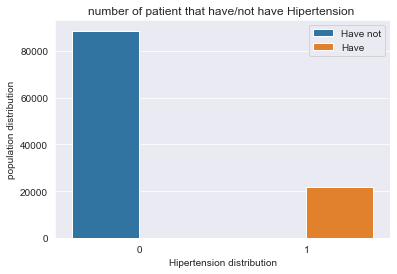

In [28]:
# creating a count plot for Hipertension distribution.
hx=sns.countplot(x ='Hipertension',hue='Hipertension', data = df)
plt.xlabel('Hipertension distribution') 
plt.ylabel('population distribution')
# displaying the title
plt.title("number of patient that have/not have Hipertension ")
label= ['Have not','Have']
# here i am using have not represent 0 and have to represent 1
plt.legend(label)
# Show the plot
plt.show()

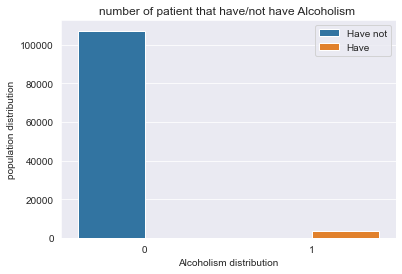

In [29]:
# creating a count plot for Alcoholism distribution.
hx=sns.countplot(x ='Alcoholism',hue='Alcoholism', data = df)
plt.xlabel('Alcoholism distribution') 
plt.ylabel('population distribution')
# displaying the title
plt.title("number of patient that have/not have Alcoholism ")
label= ['Have not','Have']
# here i am using have not represent 0 and have to represent 1
plt.legend(label)
# Show the plot
plt.show()

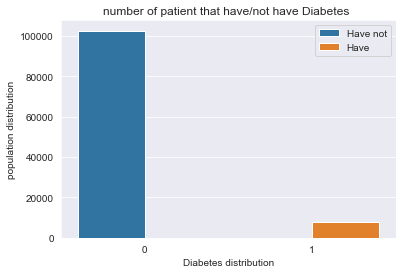

In [30]:
# creating a count plot for Diabetes distribution.
hx=sns.countplot(x ='Diabetes',hue='Diabetes', data = df)
plt.xlabel('Diabetes distribution') 
plt.ylabel('population distribution')
# displaying the title
plt.title("number of patient that have/not have Diabetes ")
label= ['Have not','Have']
# here i am using have not represent 0 and have to represent 1
plt.legend(label)
# Show the plot
plt.show()

> ### most patient in the population are not associated with any disease however, Hipertension is the most common among the patient.

In [31]:
df.SMS_received.value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

In [32]:
# to check the percentage
percentage_cal(75044)

67

67% did not recive an SMS

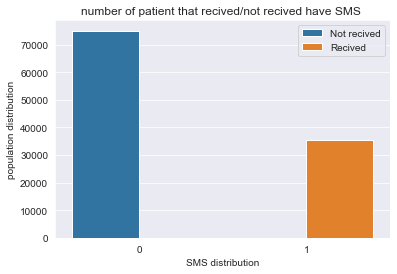

In [33]:
# creating a count plot for SMS distribution.
hx=sns.countplot(x ='SMS_received',hue='SMS_received', data = df)
plt.xlabel('SMS distribution') 
plt.ylabel('population distribution')
# displaying the title
plt.title("number of patient that recived/not recived have SMS ")
label= ['Not recived','Recived']
# here i am using not recived to represent 0 and recived to represent 1
plt.legend(label)
# Show the plot
plt.show()

> more individuals did not recive an SMS alert than the agerage that recived.

### Research Question 1 (Do Gender Affect Appointment Show Up)

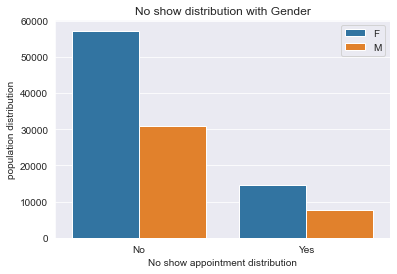

In [34]:
# creating a count plot for SMS distribution.
hx=sns.countplot(x ='no_show',hue='Gender', data = df)
plt.xlabel('No show appointment distribution') 
plt.ylabel('population distribution')
# displaying the title
plt.title("No show distribution with Gender")
plt.legend()
# Show the plot
plt.show()

In [35]:
# find value count to know their distribution
df['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

In [36]:
percentage_cal(71839)

64

64% of the population where females

In [37]:
df['no_show'].value_counts()

No     88207
Yes    22319
Name: no_show, dtype: int64

> from this distribution more females showed up for the appontment as compaired to their male counter part. Although, more female did not show up for the appointment this could be as a result of more female than male in the population distribution.

In [38]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Relationship between age and no_show appointment)

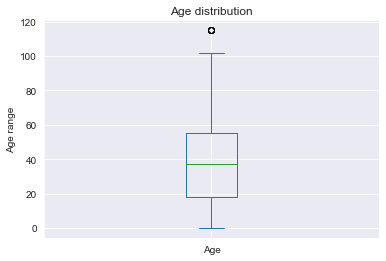

In [39]:
# creating a box plot for age distribution
df['Age'].plot(kind = 'box') 
plt.ylabel('Age range')
# displaying the title
plt.title("Age distribution");

> From the box plot i could see that individuals in the data set where between the age of around 20 years to below 60

In [40]:
df.describe().Age
# getting better age distribution with the discribe function

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [41]:
# to group the Age into groups for better distribution
Levels = [0,18,37,55,115]

# to give them names we write it as

Level_name= ['children', 'teenagers', 'adult', 'aged']

In [42]:
# to save add the range to the column
df['age_range'] = pd.cut(df['Age'], Levels, labels=Level_name)

In [43]:
# to confirm if it was stored
df.head()

,AppointmentID,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show,age_range
0,5642903,F,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,aged
1,5642503,M,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,aged
2,5642549,F,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,aged
3,5642828,F,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,children
4,5642494,F,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,aged


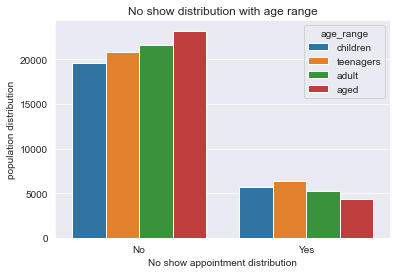

In [44]:
# creating count plot for age distrinution
sns.countplot(x ='no_show', hue = "age_range", data = df)
plt.xlabel('No show appointment distribution') 
plt.ylabel('population distribution')
# displaying the title
plt.title("No show distribution with age range")

 
# Show the plot
plt.show()

> from this distribution for no show appointment by age, more aged people came for their appointment with the children being the lest. However the teenagers where the highest population members who did not show up for thier appointment with aged people been the least.

### Research Question 3 (What day of the week did the population show up for appointment   the most.)

In [45]:
df['week_day']=df['AppointmentDay'].dt.day_name()
# created a new column with day of the week name

In [46]:
# confirm if my code was right
df.head()

,AppointmentID,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show,age_range,week_day
0,5642903,F,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,aged,Friday
1,5642503,M,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,aged,Friday
2,5642549,F,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,aged,Friday
3,5642828,F,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,children,Friday
4,5642494,F,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,aged,Friday


In [47]:
# use the value count to see the distribution
df['week_day'].value_counts()

Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17247
Saturday        39
Name: week_day, dtype: int64

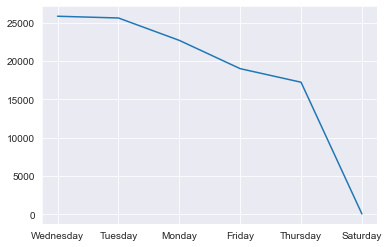

In [48]:
df['week_day'].value_counts().plot();
# ploted a line plot for distribution 

> from the count value and ploted graph most appontment day was wednesday, which was slightly higher than tuesday and saturday beeing the least.

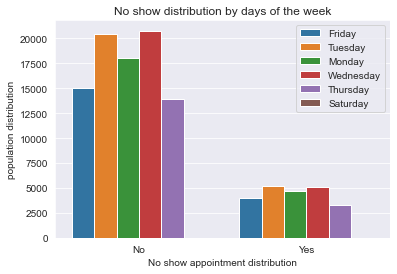

In [49]:
# creating a count plot for no show distribution by week distribution.
hx=sns.countplot(x ='no_show',hue='week_day', data = df)
plt.xlabel('No show appointment distribution') 
plt.ylabel('population distribution')
# displaying the title
plt.title("No show distribution by days of the week")
plt.legend()
# Show the plot
plt.show()

>### from the distribution the population showed up more on wednesday and thursday followed by monday and friday and thursday being the least. for the no show individuals for thursday appointment was the least.

<a id='conclusions'></a>
## Conclusions

> From my analysis, i discorverd that larger percentage showed up for appointment, with 64% of them  females and the age range included babies who where 3% of the population and are not associated with any form of disease. More so, 97% of the population did not have any disabilites, with larger individuals having no diesease while the most common disease was alcoholisim which could be as a result of the large age range between 20 and 60.

> In addition,majority of the appontment where on a week day with wednesday being the highest for both show up and no show.however, no appointment was made on sunday, 67% of the population did not recive any message and large number did not recive the scholarship.

> from the relationship, since large number of females showed up for their appointment i could not conclude if it has any effect on the gender show up.Also, large number of aged people between 55 and 115 where the highest to show up for their appointment. for further analysis will love to look into that could it be because they are associated with more disease?


> **Limitations**: The data set did not specify if the 0 age counnt where female,more varable like the type of work,the distance to the hospital are what i need to make better conclution on why some population showed up and others did not.